# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING DATASERT

In [2]:
dataset = pd.read_csv("/content/Fraud_check.csv")

In [3]:
dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
dataset.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
def conditions(s):
  if (s['Taxable.Income'] <= 30000):
        return "Risky"
  else:
        return "Good" 

In [7]:
dataset["Type"] = dataset.apply(conditions, axis = 1)

In [8]:
dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
A = pd.get_dummies(dataset)
A

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Type_Good,Type_Risky
0,68833,50047,10,1,0,0,0,1,0,1,1,0
1,33700,134075,18,0,1,1,0,0,0,1,1,0
2,36925,160205,30,1,0,0,1,0,0,1,1,0
3,50190,193264,15,0,1,0,0,1,0,1,1,0
4,81002,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,1,0
596,69967,55369,2,0,1,1,0,0,0,1,1,0
597,47334,154058,0,1,0,1,0,0,0,1,1,0
598,98592,180083,17,0,1,0,1,0,1,0,1,0


# FEATURE SELECTION

In [10]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
array = A.values
X = array[:,[1,2,3,4,5,6,7,8,9]]
Y = array[:, [-1,-2]]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[2.046e+03 1.171e-02 4.893e-02 4.517e-02 3.022e-01 7.569e-01 9.585e-02
 7.044e-03 6.951e-03]


In [12]:
features

array([[ 50047,      0,      0,      1],
       [134075,      1,      0,      0],
       [160205,      0,      1,      0],
       ...,
       [154058,      1,      0,      0],
       [180083,      0,      1,      0],
       [158137,      1,      0,      0]])

# INDEPENDENT AND DEPENDENT VARIALBE

In [13]:
X = dataset.iloc[:,[1,3,4]].values
y = dataset.iloc[:, -1].values

In [14]:
X

array([['Single', 50047, 10],
       ['Divorced', 134075, 18],
       ['Married', 160205, 30],
       ...,
       ['Divorced', 154058, 0],
       ['Married', 180083, 17],
       ['Divorced', 158137, 16]], dtype=object)

In [15]:
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

# ENCODING THE CATEGORICAL DATA

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(),[0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X

array([[0.0, 0.0, 1.0, 50047, 10],
       [1.0, 0.0, 0.0, 134075, 18],
       [0.0, 1.0, 0.0, 160205, 30],
       ...,
       [1.0, 0.0, 0.0, 154058, 0],
       [0.0, 1.0, 0.0, 180083, 17],
       [1.0, 0.0, 0.0, 158137, 16]], dtype=object)

# SPLITTING THE DATASET

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [21]:
# REMOVING THE DUMMY VARIABLE
X = X[:, 1:]

# FEATURE SCALING

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# ML_ALGORITHM- RANDOM FOREST

In [23]:
# FITTING THE MODEL
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=0)

In [24]:
# PREDICTING THE TEST
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# MAKING THE CONFUSION MATRIX

In [25]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[110   3]
 [ 36   1]]
0.74


# K-FOLD CV

In [26]:
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [27]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = kfold)
print("Accuracy: {:.2f} % " .format(accuraries.mean()*100 ))
print("Standard Deviation: {:.2f} % " .format(accuraries.std()*100))

Accuracy: 62.67 % 
Standard Deviation: 13.06 % 


# XG-BOOST

In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [30]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.33%


In [31]:
# PREDICTING THE NEW DATA POINT
new_data=pd.DataFrame({"Marital.Status_Single": 0,"Marital.Status_Married" : 1, "Marital.Status_Divorced": 0, "City.Population": 98765, "Work.Experience": 10},index=[0])
new_data

,Marital.Status_Single,Marital.Status_Married,Marital.Status_Divorced,City.Population,Work.Experience
0,0,1,0,98765,10


In [32]:
classifier.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0])

# FOR VISUALIZATIONS

In [33]:
y = dataset.iloc[:, -1].values
X = dataset.iloc[:,[3,4]].values

In [34]:
# ENCODING THE CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [35]:
# SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [36]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [37]:
# FITTING THE MODEL
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=0)

In [38]:
# PREDICTING THE TEST
y_pred = classifier.predict(X_test)

In [39]:
# MEASURING THE ACCURACY
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[102  11]
 [ 32   5]]
0.7133333333333334


<ipython-input-40-8aa8336c04f6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


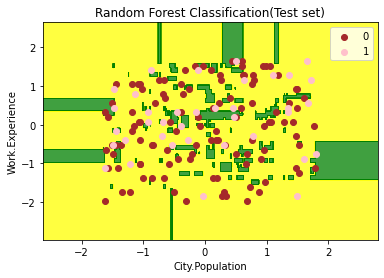

In [40]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('brown', 'pink'))(i), label= j)
plt.title('Random Forest Classification(Test set)')
plt.xlabel('City.Population')
plt.ylabel('Work.Experience')
plt.legend()
plt.show()

<ipython-input-41-20048f609d3f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


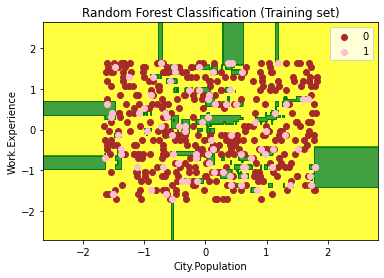

In [41]:
#Visualizing the train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('brown', 'pink'))(i), label= j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('City.Population')
plt.ylabel('Work.Experience')
plt.legend()
plt.show()